In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    roc_curve,
    precision_recall_curve, 
    average_precision_score
)

In [72]:
RANDOM_STATE = 42

In [73]:
df = pd.read_csv("./../../seminars/S05/S05-hw-dataset.csv")

In [74]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [76]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [77]:
df['default'].value_counts(normalize=True).to_frame()

,proportion
default,
0,0.589667
1,0.410333


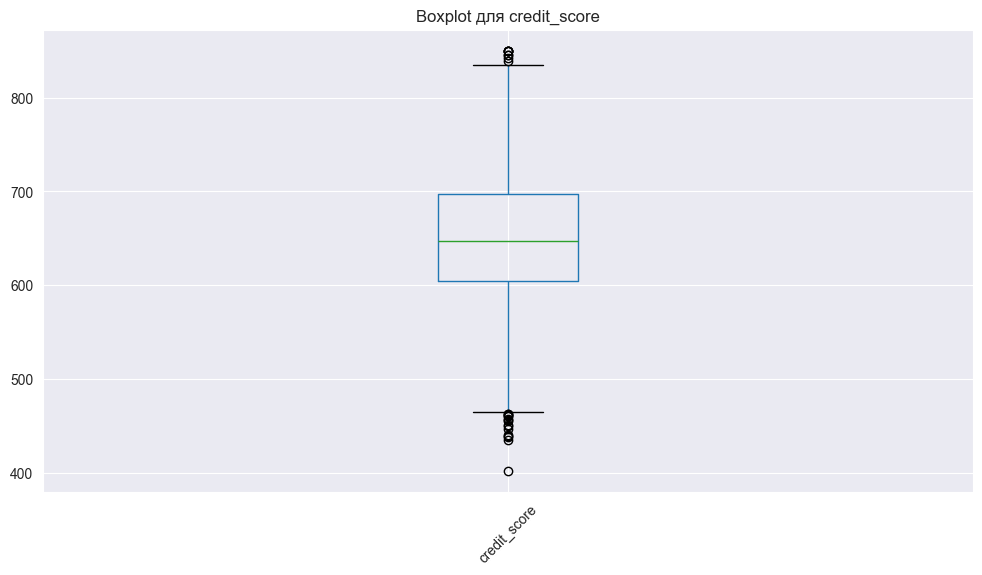

In [97]:
df[['credit_score']].boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.title('Boxplot для credit_score')
plt.savefig("./figures/boxplot_credit_score.png")
plt.show()

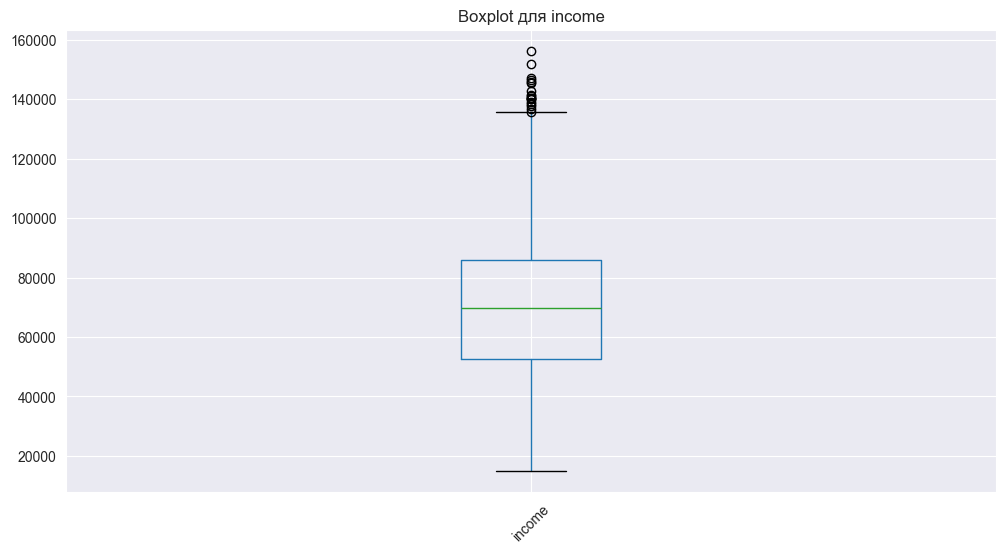

In [98]:
df[['income']].boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.title('Boxplot для income') 
plt.savefig("./figures/boxplot_income.png")
plt.show()

In [80]:
numeric_columns = df.select_dtypes(include='number').columns
for col in numeric_columns:
    print(col, df[col].min(), df[col].max())

client_id 1 3000
age 21 69
income 15000 156351
years_employed 0 39
credit_score 402 850
debt_to_income 0.0061471149847966 0.878343349584274
num_credit_cards 0 7
num_late_payments 0 14
has_mortgage 0 1
has_car_loan 0 1
savings_balance 0 75237
checking_balance -3000 29335
region_risk_score 0.0011480532639611 0.9617329449691724
phone_calls_to_support_last_3m 0 19
active_loans 0 4
customer_tenure_years 0 14
default 0 1


In [81]:
invalid_rows = df[df['age'] < df['years_employed'] + 10]
print(len(invalid_rows))
invalid_rows[['age', 'years_employed']]

617


,age,years_employed
0,25,22
6,25,25
8,30,36
9,25,23
26,40,33
...,...,...
2971,23,17
2989,41,35
2992,30,35
2996,35,36


In [82]:
"""
    Кол-во объектов в dataset 3000 штуки, по 17 признаков каждый
    Пропущенных значений нет
    Аномалии есть в income и credit_score например
    
    Есть логическая несостыковка, например есть объекты где age < years_employed + 10, хотя обычно люди начинают работать с 16-20 лет +-
    
    Таргет распределён в 59/41 
"""

'\n    Кол-во объектов в dataset 3000 штуки, по 17 признаков каждый\n    Пропущенных значений нет\n    Аномалии есть в income и credit_score например\n\n    Есть логическая несостыковка, например есть объекты где age < years_employed + 10, хотя обычно люди начинают работать с 16-20 лет +-\n\n    Таргет распределён в 59/41 \n'

In [83]:
Y = df['default']
X = df.drop(['default', 'client_id'], axis=1)

In [84]:
data_train, data_test, target_train, target_test = train_test_split(X, Y, test_size=0.25, random_state=RANDOM_STATE, stratify=Y)

In [87]:
baseline = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
baseline.fit(data_train, target_train)

,"strategy strategy: {""most_frequent"", ""prior"", ""stratified"", ""uniform"", ""constant""}, default=""prior""Strategy to use to generate predictions.* ""most_frequent"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit`. The `predict_proba` method returns the matching one-hot encoded vector.* ""prior"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit` (like ""most_frequent""). ``predict_proba`` always returns the empirical class distribution of `y` also known as the empirical class prior distribution.* ""stratified"": the `predict_proba` method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities. The `predict` method returns the class label which got probability one in the one-hot vector of `predict_proba`. Each sampled row of both methods is therefore independent and identically distributed.* ""uniform"": generates predictions uniformly at random from the list of unique classes observed in `y`, i.e. each class has equal probability.* ""constant"": always predicts a constant label that is provided by the user. This is useful for metrics that evaluate a non-majority class. .. versionchanged:: 0.24 The default value of `strategy` has changed to ""prior"" in version 0.24.",'most_frequent'
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness to generate the predictions when``strategy='stratified'`` or ``strategy='uniform'``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"constant constant: int or str or array-like of shape (n_outputs,), default=NoneThe explicit constant as predicted by the ""constant"" strategy. Thisparameter is useful only for the ""constant"" strategy.",None


In [88]:
y_pred_baseline = baseline.predict(data_test)
y_proba_baseline = baseline.predict_proba(data_test)[:, 1]

In [91]:
accuracy_score_baseline = accuracy_score(target_test, y_pred_baseline)
auc_score_baseline = roc_auc_score(target_test, y_pred_baseline)

In [92]:
accuracy_score_baseline, auc_score_baseline

(0.5893333333333334, 0.5)

In [94]:
"""
    accuracy - 0.59
    auc_score - 0.5
    
    Минимальные показатели, наша модель должна как минимум давать эти же показатели, а в идеале больше и лучше
"""

'\n    accuracy - 0.59\n    auc_score - 0.5\n\n    Минимальные показатели, наша модель должна как минимум давать эти же показатели, а в идеале больше и лучше\n'

In [96]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
])

In [111]:
param_grid = {
    "logreg__C": [0.01, 0.1, 1., 10., 100.],
    "logreg__class_weight": [None, "balanced"]
}

In [112]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

In [113]:
grid.fit(data_train, target_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'logreg__C': [0.01, 0.1, ...], 'logreg__class_weight': [None, 'balanced']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is

In [114]:
grid.best_params_

{'logreg__C': 1.0, 'logreg__class_weight': None}

In [126]:
y_pred = grid.predict(data_test)
y_proba = grid.predict_proba(data_test)[:, 1]

In [127]:
accuracy = accuracy_score(target_test, y_pred)
precision = precision_score(target_test, y_pred)
recall = recall_score(target_test, y_pred)
f1 = f1_score(target_test, y_pred)

roc_auc = roc_auc_score(target_test, y_proba)
confusion_m = confusion_matrix(target_test, y_pred)

In [128]:
print(f"""
    metrics,
    accuracy: {accuracy}
    precision: {precision}
    recall: {recall}
    f1: {f1}
    
    roc_auc: {roc_auc}
    confusion_matrix: {confusion_m}
""")


    metrics,
    accuracy: 0.7933333333333333
    precision: 0.7802197802197802
    recall: 0.6915584415584416
    f1: 0.7332185886402753

    roc_auc: 0.8647088205911735
    confusion_matrix: [[382  60]
 [ 95 213]]



In [133]:
fpr, tpr, thresholds = roc_curve(target_test, y_proba)
baseline_fpr, baseline_tpr, baseline_thresholds = roc_curve(target_test, y_proba_baseline)

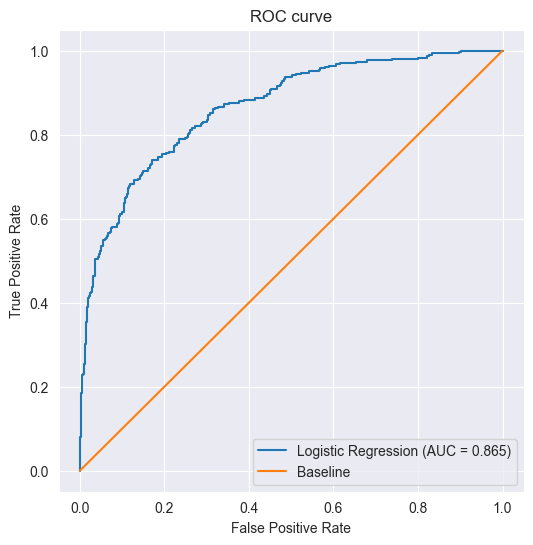

In [134]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.3f})')
plt.plot(baseline_fpr, baseline_tpr, label=f'Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.grid(True)

plt.savefig("./figures/roc_curve.png", bbox_inches='tight')
plt.show()

In [136]:
precision, recall, thresholds_p_r = precision_recall_curve(target_test, y_proba)
avg_precision = average_precision_score(target_test, y_proba)

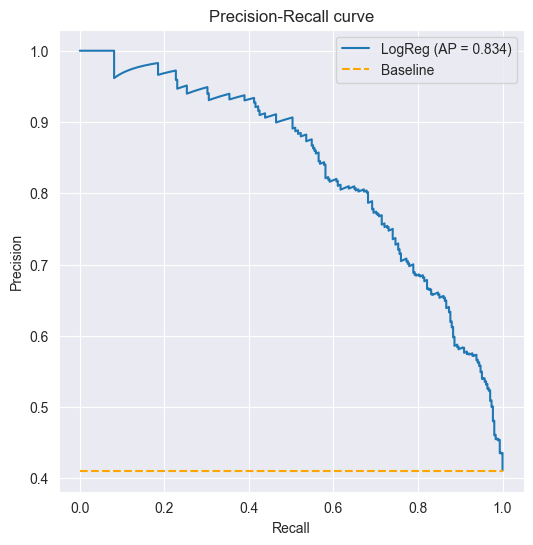

In [141]:
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label=f'LogReg (AP = {avg_precision:.3f})')
plt.hlines(
    y=target_test.mean(),
    xmin=0,
    xmax=1,
    linestyles='--',
    colors='orange',
    label=f'Baseline'
)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.legend()
plt.grid(True)

plt.savefig("./figures/pr_curve.png", bbox_inches='tight')
plt.show()


In [144]:
baseline_metrics = {
    "Accuracy": accuracy_score(target_test, y_pred_baseline),
    "ROC-AUC": roc_auc_score(target_test, y_proba_baseline),
    "Precision": precision_score(target_test, y_pred_baseline, zero_division=0),
    "Recall": recall_score(target_test, y_pred_baseline, zero_division=0),
    "F1": f1_score(target_test, y_pred_baseline, zero_division=0),
}

logreg_metrics = {
    "Accuracy": accuracy,
    "ROC-AUC": roc_auc,
    "Precision": precision_score(target_test, y_pred),
    "Recall": recall_score(target_test, y_pred),
    "F1": f1,
}

metrics_df = pd.DataFrame.from_dict(
    {
        "DummyClassifier": baseline_metrics,
        "LogisticRegression": logreg_metrics
    },
    orient="index"
)

metrics_df

,Accuracy,ROC-AUC,Precision,Recall,F1
DummyClassifier,0.589333,0.500000,0.00000,0.000000,0.000000
LogisticRegression,0.793333,0.864709,0.78022,0.691558,0.733219


In [145]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logreg__C,param_logreg__class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007981,0.002139,0.004136,0.000492,0.01,None,"{'logreg__C': 0.01, 'logreg__class_weight': None}",0.878429,0.852769,0.849322,0.856796,0.877860,0.863035,0.012563,6
1,0.007819,0.000253,0.003370,0.000624,0.01,balanced,"{'logreg__C': 0.01, 'logreg__class_weight': 'balanced'}",0.878756,0.853075,0.848955,0.856755,0.877820,0.863072,0.012670,5
2,0.006754,0.000814,0.003889,0.000795,0.10,None,"{'logreg__C': 0.1, 'logreg__class_weight': None}",0.878246,0.853666,0.850076,0.856142,0.877697,0.863165,0.012243,2
3,0.007729,0.000506,0.003910,0.000379,0.10,balanced,"{'logreg__C': 0.1, 'logreg__class_weight': 'balanced'}",0.878185,0.853809,0.849342,0.856142,0.877370,0.862970,0.012289,7
4,0.006921,0.000376,0.003658,0.000586,1.00,None,"{'logreg__C': 1.0, 'logreg__class_weight': None}",0.878083,0.853789,0.850158,0.856019,0.877799,0.863170,0.012205,1
5,0.008724,0.001417,0.003715,0.000241,1.00,balanced,"{'logreg__C': 1.0, 'logreg__class_weight': 'balanced'}",0.878021,0.853911,0.849403,0.856040,0.877288,0.862933,0.012212,10
6,0.007770,0.001106,0.004318,0.000683,10.00,None,"{'logreg__C': 10.0, 'logreg__class_weight': None}",0.878083,0.853728,0.850138,0.855937,0.877758,0.863129,0.012219,3
7,0.008277,0.000543,0.003615,0.000585,10.00,balanced,"{'logreg__C': 10.0, 'logreg__class_weight': 'balanced'}",0.878021,0.853952,0.849465,0.856019,0.877227,0.862937,0.012181,8
8,0.007122,0.000492,0.003517,0.000005,100.00,None,"{'logreg__C': 100.0, 'logreg__class_weight': None}",0.878062,0.853707,0.850138,0.855937,0.877758,0.863121,0.012217,4
9,0.007123,0.001075,0.003111,0.000578,100.00,balanced,"{'logreg__C': 100.0, 'logreg__class_weight': 'balanced'}",0.878021,0.853952,0.849465,0.856019,0.877227,0.862937,0.012181,8


In [146]:
grid.best_params_

{'logreg__C': 1.0, 'logreg__class_weight': None}

In [147]:
"""
    Baseline намного хуже справляется с оцениванием и решением нашей проблемы, чем модель логистической регрессии
    Accuracy выросла с 0.59 до 0.793, что является неплохим показателем, при том, что ROC-AUC стала 0.8647 с 0.5
    
    При C = 0.01 или C = 100 справлялось куда хуже, чем при C в районе 1 (с 0.1 до 10)
    Также при class_weight = None дает результаты куда лучше, чем Balanced
    
    Лучшее решение даёт модель логистической регресии, чем модель которая случайно угадывает, так как есть дисбаланс классов (примерно 59 к 41), также AUC-ROC и PR кривые показывает лучший результат(причем намного), чем Baseline   
"""

'\n    Baseline намного хуже справляется с оцениванием и решением нашей проблемы, чем модель логистической регрессии\n    Accuracy выросла с 0.59 до 0.793, что является неплохим показателем, при том, что ROC-AUC стала 0.8647 с 0.5\n\n    При C = 0.01 или C = 100 справлялось куда хуже, чем при C в районе 1 (с 0.1 до 10)\n    Также при class_weight = None дает результаты куда лучше, чем Balanced\n\n    Лучшее решение даёт модель логистической регресии, чем модель которая случайно угадывает, так как есть дисбаланс классов (примерно 59 к 41), также AUC-ROC и PR кривые показывает лучший результат(причем намного), чем Baseline   \n'